# Import libraries 

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
import seaborn as sns

# Reading Data

In [183]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [184]:
df=df[df.DAILY_STRESS !='1/1/00']
df['DAILY_STRESS']=pd.to_numeric(df['DAILY_STRESS'])
df=df.drop(['Timestamp'], axis=1)
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [185]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,...,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,...,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,666.750510
std,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,...,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,45.021103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


## Dummy categorical data

In [186]:
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [187]:
cat_df=df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
df=create_dummy_df(df, cat_cols_lst, dummy_na=False)
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,GENDER_Female,GENDER_Male
0,3,2,2,5,0,5,2,0,1,6,...,4,0,5,609.5,0,1,0,0,1,0
1,2,3,4,3,8,10,5,2,2,5,...,3,2,6,655.6,0,1,0,0,1,0
2,2,3,3,4,4,10,3,2,2,2,...,4,8,3,631.6,0,1,0,0,1,0
3,3,3,10,3,10,7,2,5,2,3,...,5,2,0,622.7,0,0,1,0,1,0
4,5,1,3,3,10,4,2,4,2,5,...,8,1,5,663.9,0,0,1,0,1,0


## Scaling data

In [188]:
df_scale=df.copy()
df_scale=(df_scale-df_scale.min())/(df_scale.max()-df_scale.min())
df_scale.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,GENDER_Female,GENDER_Male
0,0.6,0.4,0.2,0.5,0.0,0.5,0.2,0.0,0.0,0.6,...,0.4,0.0,0.5,0.380658,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,0.6,0.4,0.3,0.8,1.0,0.5,0.4,1.0,0.5,...,0.3,0.2,0.6,0.516167,0.0,1.0,0.0,0.0,1.0,0.0
2,0.4,0.6,0.3,0.4,0.4,1.0,0.3,0.4,1.0,0.2,...,0.4,0.8,0.3,0.445620,0.0,1.0,0.0,0.0,1.0,0.0
3,0.6,0.6,1.0,0.3,1.0,0.7,0.2,1.0,1.0,0.3,...,0.5,0.2,0.0,0.419459,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.2,0.3,0.3,1.0,0.4,0.2,0.8,1.0,0.5,...,0.8,0.1,0.5,0.540564,0.0,0.0,1.0,0.0,1.0,0.0


# Part I: How does stress, vacation loss, and shouting affect work-life balance?

/var/folders/gg/j55n7dhj5lgf2k91v90hk5xm0000gn/T/ipykernel_18626/3359566849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Work life Balance Score'] = pd.cut(df['WORK_LIFE_BALANCE_SCORE'], bins=bins, labels=labels, right=False)


<AxesSubplot:xlabel='Work life Balance Score'>

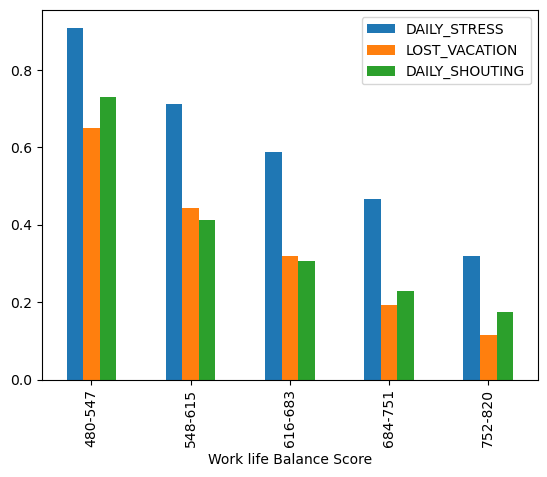

In [189]:
df1=df_scale[['DAILY_STRESS','LOST_VACATION', 'DAILY_SHOUTING']]
bins= [480,548,616,684,752,820]
labels = ['480-547','548-615','616-683','684-751','752-820',]
df1['Work life Balance Score'] = pd.cut(df['WORK_LIFE_BALANCE_SCORE'], bins=bins, labels=labels, right=False)
overall_score=pd.DataFrame(df1.groupby(['Work life Balance Score']).mean())
overall_score.plot(kind='bar')

# Part II: how suggested activates reduces stress?

In [195]:
df_activites=df_scale[['FRUITS_VEGGIES', 'PLACES_VISITED','SUPPORTING_OTHERS',
                       'SOCIAL_NETWORK', 'DONATION','DAILY_STEPS',
                       'SLEEP_HOURS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']]
df_activites['DAILY_STRESS']=df['DAILY_STRESS']
df_activites.groupby(['DAILY_STRESS']).mean()

/var/folders/gg/j55n7dhj5lgf2k91v90hk5xm0000gn/T/ipykernel_18626/3155198184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activites['DAILY_STRESS']=df['DAILY_STRESS']


,FRUITS_VEGGIES,PLACES_VISITED,SUPPORTING_OTHERS,SOCIAL_NETWORK,DONATION,DAILY_STEPS,SLEEP_HOURS,TIME_FOR_PASSION,WEEKLY_MEDITATION
DAILY_STRESS,,,,,,,,,
0,0.636686,0.575888,0.574112,0.617751,0.557988,0.575937,0.717949,0.441568,0.784911
1,0.605730,0.572680,0.570097,0.621953,0.563196,0.539189,0.696350,0.384140,0.709726
2,0.601996,0.552275,0.567890,0.650866,0.552568,0.533933,0.684245,0.353918,0.651541
3,0.595362,0.536357,0.569941,0.664006,0.543929,0.528675,0.668561,0.327240,0.618213
4,0.562838,0.488919,0.543986,0.657534,0.525946,0.504505,0.653641,0.296723,0.554426
5,0.520858,0.420029,0.544444,0.631969,0.520663,0.479424,0.636615,0.262524,0.529532


<AxesSubplot:xlabel='DAILY_STRESS'>

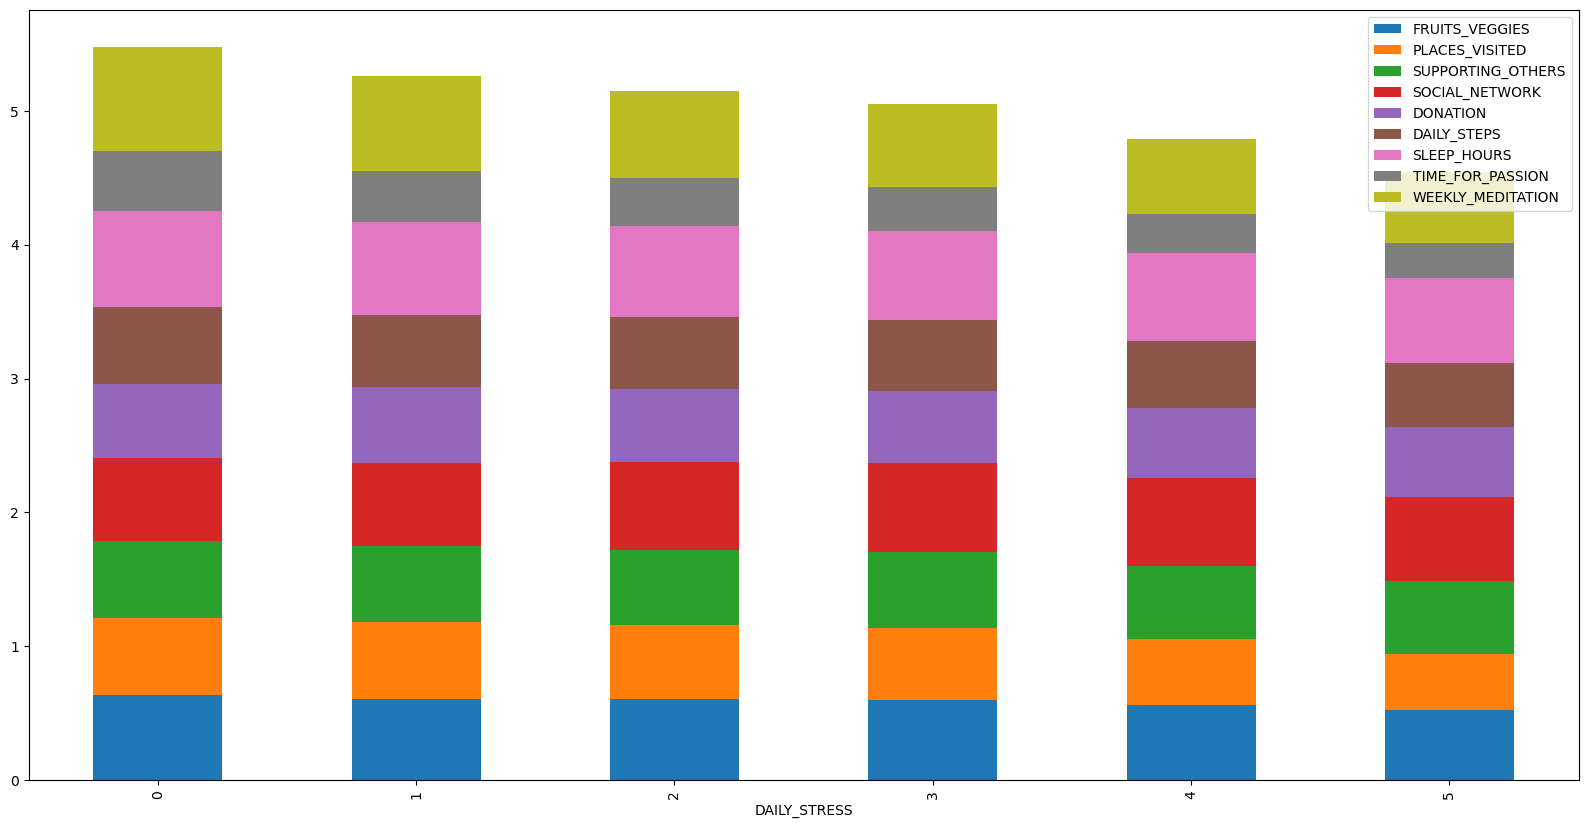

In [196]:
overall_score=pd.DataFrame(df_activites.groupby(['DAILY_STRESS']).mean())
overall_score.plot(kind='bar',stacked=True,figsize=(20,10))

# Part III: Does healthy habits relates to bmi?

In [171]:
df1 = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

Text(0.5, 0.98, 'the relation of Healthy habits with BMI')

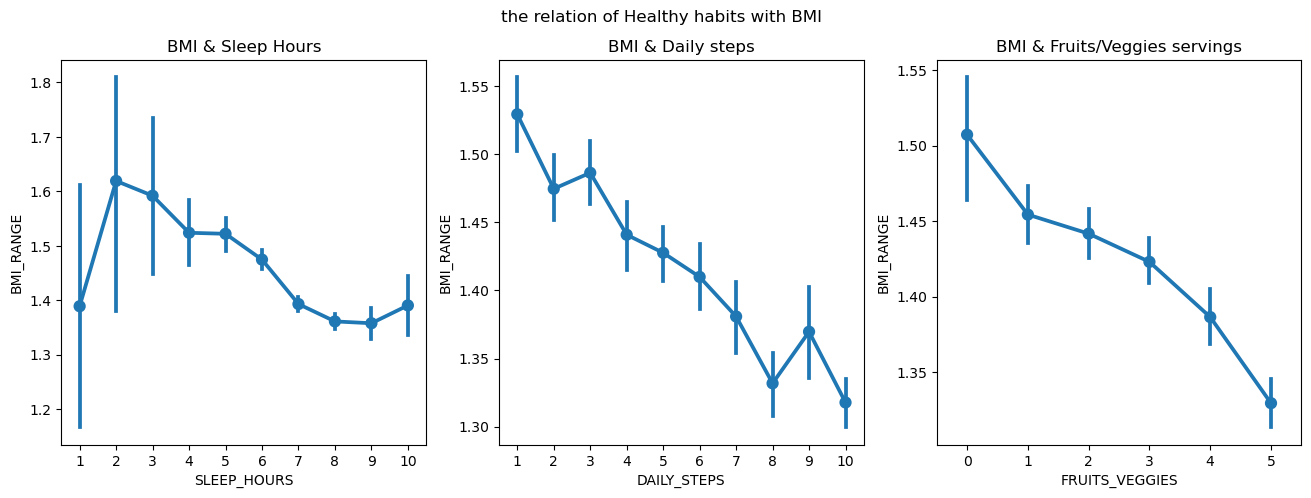

In [172]:
figure,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].set_title('BMI & Sleep Hours')
sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df1, ax = ax[0])

ax[1].set_title('BMI & Daily steps')
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df1, ax = ax[1])

ax[2].set_title('BMI & Fruits/Veggies servings')
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df1, ax = ax[2])

figure.suptitle('the relation of Healthy habits with BMI')

# Applying ML to predict Work-Life Balance score

### determine Correlation of each feature with 'WORK_LIFE_BALANCE_SCORE'

In [173]:
df_scale[df_scale.columns[1:]].corr()['WORK_LIFE_BALANCE_SCORE'][:]

DAILY_STRESS              -0.365399
PLACES_VISITED             0.529673
CORE_CIRCLE                0.507594
SUPPORTING_OTHERS          0.548854
SOCIAL_NETWORK             0.412580
ACHIEVEMENT                0.561241
DONATION                   0.458825
BMI_RANGE                 -0.252026
TODO_COMPLETED             0.545503
FLOW                       0.478218
DAILY_STEPS                0.422981
LIVE_VISION                0.471319
SLEEP_HOURS                0.196420
LOST_VACATION             -0.266318
DAILY_SHOUTING            -0.273143
SUFFICIENT_INCOME          0.403554
PERSONAL_AWARDS            0.504225
TIME_FOR_PASSION           0.516979
WEEKLY_MEDITATION          0.416229
WORK_LIFE_BALANCE_SCORE    1.000000
AGE_21 to 35              -0.099275
AGE_36 to 50               0.007135
AGE_51 or more             0.126391
AGE_Less than 20          -0.021028
GENDER_Female              0.039911
GENDER_Male               -0.039911
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

### Split data

In [174]:
X=df_scale[['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',
       'AGE_21 to 35', 'AGE_36 to 50',
       'AGE_51 or more', 'AGE_Less than 20', 'GENDER_Female', 'GENDER_Male']]
y=df_scale['WORK_LIFE_BALANCE_SCORE']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

### Generate Linear Regression

In [176]:
lm_model= make_pipeline(LinearRegression())

In [177]:
lm_model.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

### Predicting score

In [178]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [179]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

## Results

In [180]:
train_score

0.9189026079358931

In [181]:
test_score

0.9108087979315423